In [16]:
# Basic Template
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import ncxt_sxtcnn
from ncxt_sxtcnn.pipe import NCXTPipe
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from ncxt_sxtcnn.sxtcnn.models import UNet3D

In [47]:
model = UNet3D(2, in_channels=1, depth=4, start_filts=16)

In [48]:
tensor = torch.zeros((1,1,96,96,96))
r = [l // 2 for l in tensor.shape]
tensor[tuple(r)] = 1
rf = model.receptive_fied(tensor)
rf = rf.cpu().numpy()

In [49]:
sli = rf[:,:,r[-1]]

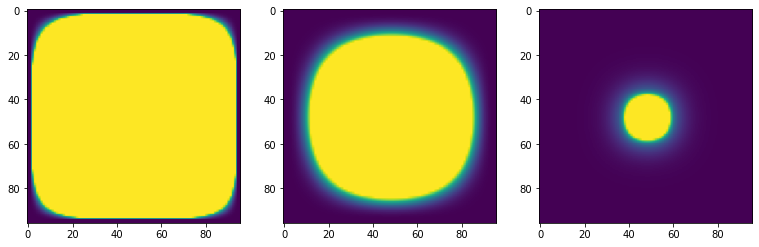

In [51]:
f, axes = plt.subplots(ncols = 3, figsize = (13,5))
for ax, th in zip(axes.ravel(),[1e-9,1e-6,1e-3]):
    ax.imshow(np.clip(sli, 0, th))

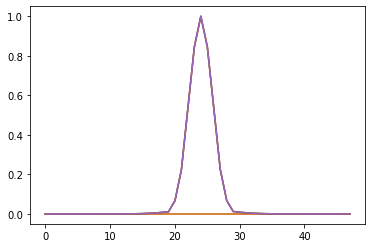

In [24]:
plt.plot(rf[:,r,r])